In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import cm

In [2]:
# some constant values
a = 1.0 # meters
b = 0.25 # meters
m = .250 # kg
alpha = 1.67 # rad/sec
g = 9.8
N = 10000 # number of iterations
h = .001 # step size

In [3]:
# create some empty arrays
theta = np.zeros(N+1)
omega =np.zeros(N+1)
thetadot = np.zeros(N+1)
omegadot = np.zeros(N+1)
t = np.zeros(N+1)
x = np.zeros(N+1)
y = np.zeros(N+1)

In [4]:
# initial condition
theta[0] = np.pi/2.0

In [5]:
# define some functions
def thetadot(omega):
    return omega
def omegadot(theta, t):
    return (a * alpha**2 / b) * np.cos(theta - alpha * t) - (g/b) * np.sin(theta)

In [6]:
for i in range(N):
    k1_thetadot = h * thetadot(omega[i])
    k1_omegadot = h * omegadot(theta[i], t[i])
    
    k2_thetadot = h * thetadot(omega[i] + k1_thetadot/2.0)
    k2_omegadot = h * omegadot(theta[i] + k1_omegadot/2.0, t[i] + k1_omegadot/2.0)
    
    k3_thetadot = h * thetadot(omega[i] + k2_thetadot/2.0)
    k3_omegadot = h * omegadot(theta[i] + k2_omegadot/2.0, t[i] + k2_omegadot/2.0)
    
    k4_thetadot = h * thetadot(omega[i] + k3_thetadot)
    k4_omegadot = h * omegadot(theta[i] + k3_omegadot, t[i] + k3_omegadot)
    
    theta[i+1] = theta[i] + (k1_thetadot + 2*k2_thetadot + 2*k3_thetadot + k4_thetadot)/6.0
    omega[i+1] = omega[i] + (k1_omegadot + 2*k2_omegadot + 2*k3_omegadot + k4_omegadot)/6.0
    t[i+1] = t[i] + h

Text(0, 0.5, 'theta')

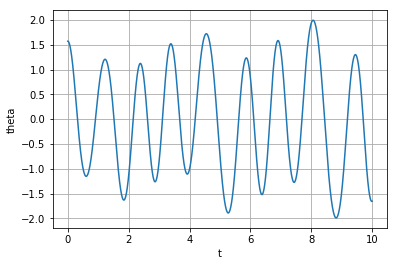

In [7]:
plt.plot(t,theta)
plt.grid(b=True, which='both', color='0.65', linestyle='-')
#plt.title('Lagrangian x / y', fontsize=14)
plt.xlabel('t')
plt.ylabel('theta')

In [8]:
# compute some x, y coordinates
def x_vec(theta, t):
    return a * np.cos(alpha * t) + b * np.sin(theta)
def y_vec(theta, t):
    return a * np.sin(alpha * t) - b * np.cos(theta)

In [9]:
for i in range(N+1):
    x[i] = x_vec(theta[i], t[i])
    y[i] = y_vec(theta[i], t[i])

Text(0, 0.5, 'y')

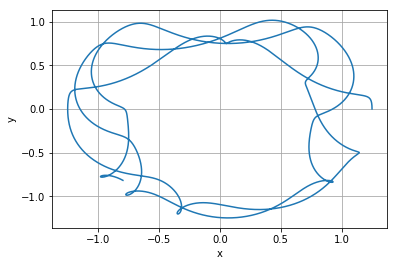

In [10]:
plt.plot(x,y)
plt.grid(b=True, which='both', color='0.65', linestyle='-')
#plt.title('Lagrangian x / y', fontsize=14)
plt.xlabel('x')
plt.ylabel('y')